<table>
    <tr style="background-color:white;">
        <td width="60%">
            <div style="height: 25px;"></div>
            <div align="left" style="color: #4b324e; font-size: 40px; font-weight: bold;">Taller de Qiskit</div>
        </td>
        <td>
            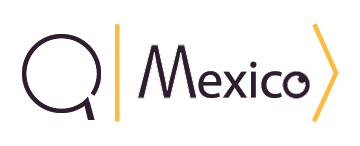
        </td>
    </tr>
</table>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $

<div align="center" style="color: #EE2A6F; font-size: 30px; font-weight: bold;">Qiskit Finance</div>

<div align="right" style="font-size: 15px; font-weight: normal;">Preparado por Claudia Zendejas-Morales</div>

<a href="https://opensource.org/licenses/Apache-2.0"></a>

# Contenido

1. [Introducción](#intro)
    1. [Cartera](#intro.1)
    2. [Problema de optimización](#intro.2)
2. [Optimización de cartera](#secc1)
   1. [Modelo](#secc1.1)
   2. [Ejemplo: Cartera de acciones de la bolsa de mercado](#secc1.2)
3. [Solución con Qiskit](#secc2)
   1. [Definir la instancia del problema](#secc2.1)
   2. [Referencia clásica, solución con NumPyMinimumEigensolver](#secc2.2)
   3. [Solución con VQE](#secc2.3)
   4. [Solución con QAOA](#secc2.4)
4. [Usando datos financieros reales](#secc3)
5. [Referencias](#secc4)

<a id="intro"></a>
# Introducción

Las **finanzas** estudian cómo los agentes económicos (empresas, familias o Estado) deben tomar decisiones de inversión, ahorro y gasto en condiciones de incertidumbre. Al momento de tomar estas decisiones los agentes pueden optar por diversos tipos de recursos financieros tales como: dinero, bonos, acciones o derivados, incluyendo la compra de bienes de capital como maquinarias, edificios y otras infraestructuras.

Con el paso del tiempo, las instituciones financieras y sus productos se han ido evolucionando y modernizando. Han aparecido nuevos intermediarios distintos a los bancos tradicionales (como por ejemplo sociedades gestoras de carteras, instituciones de inversión colectiva, etc.) y también nuevos productos financieros que ofrecen multitud de opciones a los clientes.

En cuanto a su desarrollo teórico, recién en el siglo XX las finanzas pasan a constituirse como un área de estudio propiamente dicha. Su origen puede encontrarse en los trabajos de [Irving Fisher](https://economipedia.com/definiciones/irving-fisher.html) en 1897 en donde se refiere a las finanzas como una nueva disciplina.

Su ámbito de estudio se ha ido perfeccionando en el tiempo, con el desarrollo de teorías que intentan explicar la determinación óptima del precio de los activos, la rentabilidad esperada, las decisiones en escenarios de incertidumbre, etc.

Por supuesto la resolución de problemas financieros se ha encontrado con la **Computación Cuántica**. En este notebook exploraremos un ejemplo de optimización y cómo resolverlo con Qsikit.

Pero primero hablemos de lo que es una **cartera** en el ámbito financierto y la definición de un **problema de optimizacion**.

<a id="intro.1"></a>
## Cartera

Una cartera financiera es un grupo de activos que tiene un inversor o una sociedad de inversión. Los activos de una cartera de inversión pueden ser de varios tipos: por ejemplo, acciones, bonos, materias primas o derivados.

Por regla general, una cartera reflejará el perfil del inversor que la ha creado, en cuanto a su tolerancia al riesgo y a los componentes clave de estrategia de inversión que la forman.

Un inversor que tenga como meta obtener beneficios a largo plazo con poco riesgo tendrá una cartera formada por acciones de empresas de prestigio, bonos o fondos de índices y realizará pocas compras y ventas a corto plazo. En cambio, un inversor en operaciones intradía tendrá una cartera con mucha más actividad, formada por inversiones en el mercado de divisas o posiciones largas y cortas en derivados con apalancamiento.

Un ejemplo, es cuando estás dispuesto a invertir en acciones de la bolsa de valores. Ya sea que tu mismo o que algún consejero financiero te proponga una cartera de inversión, es decir una lista de acciones, digamos, acciones de empresas famosas como Apple, IBM, Google, Tesla, entre muchas otras.

<a id="intro.2"></a>
## Problema de optimización

En matemáticas, ciencias de la computación y economía, un problema de optimización es el problema de encontrar la mejor solución a partir de todas las soluciones factibles.

La forma estándar de un problema de optimización es

\begin{align*}
\texttt{minimizar} \;\;\; &f(x)\\
\texttt{sujeto a} \;\;\; &g_i(x)\leq 0, \;\;\;\; i = 1,\cdots ,m\\
&h_j(x)=0, \;\;\;\; j = 1,\cdots ,p
\end{align*}

Donde,

- $f:\mathbb{R}^n\rightarrow\mathbb{R}$ es la **función objetivo** a ser minimizada sobre el vector $x$ de $n$ variables
- $g_i(x)\leq 0$ son llamadas restricciones de desigualdad
- $h_j(x)= 0$ son llamadas restricciones de igualdad
- $m\geq 0$ y $p\geq 0$

Si $m=p=0$ el problema se trata de una optimización sin restriciones. Por convención, la forma estándar define un *problema de minimización*. Un *problema de maximización* puede ser abordado al multiplicar por $-1$ la función objetivo.

Por supuesto podemos aplicar estos modelos matemáticos a las finanzas, como ya se ha mencionado. Toda decisión financiera se realiza para maximizar o minimizar una función objetivo, generalmente relacionada con la rentabilidad o utilidades, debiendo respetar determinados requerimientos de espacio físico, o inversión, o tiempos, entre otros recursos.

<a id="secc1"></a>
# Optimización de cartera

Imagínate que tienes una cartera financiera en la que deseas invertir. Por supuesto lo que deseas es obtener los mejores rendimientos de tu inversión, pero no sabes qué variables considerar para lograrlo. ¿Deberías leer todo tipo de informes? ¿De todos los tipos posibles de activos? Es absurdo. Debe de haber un método para optimizar y elegir de forma eficiente tu cartera. De hecho, la hay: **la optimización de cartera**.

Cuando hablamos de esto, significa el proceso de elección de los pesos de los diferentes activos para su cartera con la finalidad de obtener el mejor beneficio posible comparado con carteras de composiciones o perfiles de riesgo similares. Las principales proporciones que se tienen en cuenta son los rendimientos esperados y la volatilidad esperada. Los sistemas de optimización incluyen límites de volatilidad tolerada y pesos por activo.

Esta optimización está relacionada con el modelo de frontera eficiente de [Markowitz](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1540-6261.1952.tb01525.x) que propone guiar tus inversiones maximizando los rendimientos y reduciendo el riesgo. La cuestión principal que apoya este modelo es la elección de activos con baja correlación o sin correlación. Una diversificación inteligente es la idea subyacente. Una cartera eficiente significa una cartera bien diversificada.

Actualmente existen diferentes métodos y enfoques para resolver los problemas de optimización de cartera. Para más detalles visita [este enlace](https://es.wikipedia.org/wiki/Optimizaci%C3%B3n_de_la_cartera).

Retomando el ejemplo de la cartera de acciones de la bolsa de valores, lo que deseamos ahora es que de entre todas las opciones existentes, elijamos el subconjunto de las acciones que nos convienen más.

<a id="secc1.1"></a>
## Modelo

En este notebook vamos a resolver el **problema de optimización de la cartera de varianza media** para $n$ activos. El planteamiento matemático de este modelo es:

\begin{align*}
\min_{x \in \{0, 1\}^n} \;\;\; &  q x^T \Sigma x - \mu^T x\\
\text{sujeto a:} \;\;\;& 1^T x = B
\end{align*}

Donde usamos la siguiente notación:

- $x \in \{0, 1\}^n$ denota el vector de variables de decisión binarias, que indican qué activos elegir ($x_i = 1$) y cuáles no elegir ($x_i = 0$),
- $\mu \in \mathbb{R}^n$ define los rendimientos esperados de los activos,
- $\Sigma \in \mathbb{R}^{n \times n}$ especifica las covarianzas entre los activos,
- $q > 0$ controla el apetito por el riesgo de quien toma las decisiones,
- $B$ denota el presupuesto, es decir, el número de activos que se seleccionarán de los $n$ disponibles.
- La forma de expresar la transpuesta de algún vector o matriz se expresa con el superíndice $T$.

Estamos asumiendo las siguientes simplificaciones:

- todos los activos tienen el mismo precio (normalizado a $1$)
- el presupuesto $B$ tiene que ser gastado, es decir, tenemos que seleccionar exactamente $B$ activos

La restricción de igualdad $1^Tx=B$ se asigna a un [término de penalización](https://en.wikipedia.org/wiki/Penalty_method) $\left(1^Tx-B\right)$ que se escala mediante un parámetro y se resta de la función objetivo. El problema resultante se puede asignar a un Hamiltoniano cuyo estado fundamental corresponde a la solución óptima. Este notebook muestra cómo usar el Solucionador Propio Cuántico Variacional (Variational Quantum Eigensolver, [VQE](https://www.mustythoughts.com/variational-quantum-eigensolver-explained)) o el Algoritmo de Optimización Aproximada Cuántica (Quantum Approximate Optimization Algorithm, [QAOA](https://www.mustythoughts.com/quantum-approximate-optimization-algorithm-explained)) para encontrar la solución óptima para un conjunto de parámetros dado.

Los experimentos en hardware cuántico real para este problema se informan, por ejemplo, en el siguiente artículo: [Improving Variational Quantum Optimization using CVaR. Barkoutsos et al. 2019](https://arxiv.org/abs/1907.04769).

<a id="secc1.2"></a>
## Ejemplo: Cartera de acciones de la bolsa de mercado

Como ya hemos mencionado, el ejemplo que resolvemos en este notebook con [Qiskit Finance](https://qiskit.org/documentation/finance/), consiste en plantear una cartera de acciones de la cual, una vez optimizada, podamos tomar una decisión informada en cuáles acciones nos conviene invertir.

<div class="alert alert-block alert-danger">

**Nota**: Esto es una simulación y no representa un consejo financiero. De hecho los datos usados aquí son números aleatorios que sirven como ejemplo solamente.
    
</div>

Entonces, de acuerdo al modelo, los **activos** en nuestro ejemplo son [acciones](https://es.wikipedia.org/wiki/Acci%C3%B3n_(finanzas)) de una [bolsa de valores](https://es.wikipedia.org/wiki/Bolsa_de_valores). La manera de identifiar una acción es con su [Ticker](https://en.wikipedia.org/wiki/Ticker_symbol) o [código bursátil](https://es.wikipedia.org/wiki/S%C3%ADmbolo_burs%C3%A1til), este código varia entre las diferentes bolsas de valores. Para fines de este notebook, llamaremos a los tickers simplemente _Company0_, _Company1_, _Company2_, etc.


<a id="secc2"></a>
# Solución con Qiskit

In [1]:
from qiskit import Aer
from qiskit.algorithms import VQE, QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_finance.data_providers import RandomDataProvider
from qiskit.utils import algorithm_globals
import numpy as np
import datetime
import matplotlib.pyplot as plt

<a id="secc2.1"></a>
## Definir la instancia del problema

Primero generemos los datos aleatorios que representarán nuestras [series de tiempo](https://en.wikipedia.org/wiki/Time_series) correspondientes a las acciones que queremos optimizar. Para esto utilizamos la clase `RandomDataProvider` que Qiskit nos provee.

Para mantener las cosas simples, manejaremos una cartera de 4 acciones (activos), es decir, $n=4$.

In [2]:
# indicar el número de activos (= número de qubits)

num_assets = 4  # variable 'n' en el modelo



seed = 123      # una semilla para generar los datos aleatorios

# Generar el rendimiento esperado y la matriz de covarianza a partir de series de tiempo (aleatorias)
stocks = [("Company%s" % i) for i in range(num_assets)]
data = RandomDataProvider(tickers = stocks,
                          start = datetime.datetime(2016,1,1),
                          end = datetime.datetime(2016,1,30),
                          seed = seed)
data.run()
mu = data.get_period_return_mean_vector()
sigma = data.get_period_return_covariance_matrix()

Ahora grafiquemos las [series de tiempo](https://en.wikipedia.org/wiki/Time_series) que fueron generadas de manera aleatoria.
Lo que se ve en la gráfica (con datos aleatorios, no reales) es la representación del precio de la acción durante un periodo de tiempo, es decir, en el eje horizontal tenemos fechas y en el eje vertical tenemos los precios de la acciones.

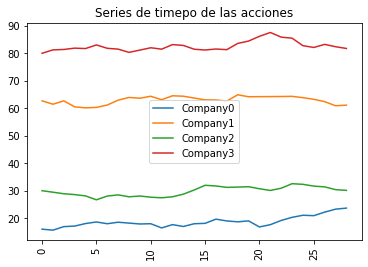

In [3]:
for (cnt, s) in enumerate(stocks):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.title("Series de timepo de las acciones")
plt.xticks(rotation=90)
plt.show()

Ahora especifiquemos los valores del problema de optimización: Factor de riesgo $q=0.5$, presupuesto $B=n/2$, factor de escala para la penalización presupuestaria $p=n$.

In [4]:
q = 0.5                   # valor de riesgo
budget = num_assets // 2  # presupuesto, usamos el doble '//' para asegurarnos de obtener un número entero (función piso)
penalty = num_assets      # parámetro para escalar el término de penalización presupuestaria

Ahora creamos el objeto que plantea el problema de optimización, esto lo hacemos con ayuda de la clase `PortfolioOptimization`, [aquí](https://qiskit.org/documentation/finance/stubs/qiskit_finance.applications.PortfolioOptimization.html) puedes consultar su API completa.

In [5]:
# planteamiento del problema de optimización
portfolio = PortfolioOptimization(expected_returns = mu, covariances = sigma, risk_factor = q, budget = budget)


Para poder resolver el problema con computación cuántica, debemos traducirlo a su representación de programa cuadrático restringido cuadráticamente ([Quadratically Constrained Quadratic Program](https://en.wikipedia.org/wiki/Quadratically_constrained_quadratic_program), QCQP), para un tutorial dedicado a esta representación dirígete a [este enlace](https://qiskit.org/documentation/tutorials/optimization/1_quadratic_program.html).

Afortunadamente, Qiskit nos provee de un método que realiza esta tarea eficientemente: `to_quadratic_program`, el cual nos regresa una instancia de la clase `QuadraticProgram`, [aquí](https://qiskit.org/documentation/stubs/qiskit.optimization.QuadraticProgram.html) puedes ver su API completa.

In [6]:
# generamos su correspondiente programa cuadrático 
qp = portfolio.to_quadratic_program()
qp

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Portfolio optimization

Minimize
 obj: - 0.015284386652 x_0 + 0.000780952145 x_1 - 0.000517920547 x_2
      - 0.000870005837 x_3 + [ 0.002541388592 x_0^2 + 0.000146804433 x_0*x_1
      + 0.000257201062 x_0*x_2 - 0.000199722426 x_0*x_3 + 0.000258486713 x_1^2
      + 0.000106085519 x_1*x_2 + 0.000088963242 x_1*x_3 + 0.000791504681 x_2^2
      - 0.000247774763 x_2*x_3 + 0.000197892585 x_3^2 ]/2
Subject To
 c0: x_0 + x_1 + x_2 + x_3 = 2

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1

Binaries
 x_0 x_1 x_2 x_3
End

Observemos que al imprimir los detalles de la instancia de `QuadraticProgram` generada, podemos confirmar cómo se está usando el modelo. Nos está indicando que se está buscando minimizar la función objetivo:

\begin{align*}
f(x)= &- 0.015284386652 \; x_0 + 0.000780952145 \; x_1 - 0.000517920547 \; x_2 - 0.000870005837 \; x_3\\
&+ \frac{1}{2}\big[ 0.002541388592 \; x_0^2 + 0.000146804433 \; x_0*x_1 + 0.000257201062 x_0*x_2 - 0.000199722426 x_0*x_3\\
&\; + 0.000258486713 \; x_1^2 + 0.000106085519 \; x_1*x_2 + 0.000088963242 \; x_1*x_3\\
&\; + 0.000791504681 \; x_2^2 - 0.000247774763 \; x_2*x_3 + 0.000197892585 \; x_3^2 \big]
\end{align*}
      
Esta función contiene términos cuadráticos como es de esperarse pues ya se trata del problema QCQP.

También podemos observar la lista de variables, las cuales van de $x_0$ hasta $x_3$, pues elegimos $n=4$ (recordemos que en Python los índices comienzan en $0$), estas cuatro variables están restringidas por $0\leq x_i\leq 1$, pero esto es una manera de expresar los valores que pueden tomar, porque estrictamente para este problema de optimización de cartera, las variables solo pueden tener uno de dos valores:
- $x_i=1$ si es que es un activo **seleccionado**
- $x_i=0$ si es que es un activo **no seleccionado**

Ahora definamos algunas funciones que nos ayudarán a imprimir los resultados de manera clara:

In [7]:
def index_to_selection(i, num_assets):
    s = "{0:b}".format(i).rjust(num_assets)
    x = np.array([1 if s[i]=='1' else 0 for i in reversed(range(num_assets))])
    return x

def print_result(result):
    selection = result.x
    value = result.fval
    print('Optimización: selección {}, valor {:.4f}'.format(selection, value))

    eigenstate = result.min_eigen_solver_result.eigenstate
    eigenvector = eigenstate if isinstance(eigenstate, np.ndarray) else eigenstate.to_matrix()
    probabilities = np.abs(eigenvector)**2
    i_sorted = reversed(np.argsort(probabilities))
    print('\n----------------- Resultado completo ---------------------')
    print('')
    print('selección\tvalor\t\tprobabilidad')
    print('------------------------------------------------------------')
    for i in i_sorted:
        x = index_to_selection(i, num_assets)
        value = QuadraticProgramToQubo().convert(qp).objective.evaluate(x)
        probability = probabilities[i]
        print('%10s\t%.4f\t\t%.4f' %(x, value, probability))

<a id="secc2.2"></a>
## Referencia clásica, solución con NumPyMinimumEigensolver

Resolvamos el problema. Primero clásicamente.

Ahora podemos usar el problema que construimos anteriormente sin tener en cuenta los detalles de cómo se creó, de eso se encarga Qiskit. Configuramos el algoritmo para resolver con la clase `NumPyMinimumEigensolver`, de esta manera, tendremos una referencia clásica, algo con que comparar los resultados obtenidos con computación cuántica. El problema está fijado para ["ising"](https://arxiv.org/pdf/2009.09208.pdf). No se requiere backend, ya que se calcula de forma clásica sin utilizar el cálculo cuántico. El resultado se devuelve como un diccionario.

In [8]:
exact_mes = NumPyMinimumEigensolver()                 # solucionador clásico
exact_eigensolver = MinimumEigenOptimizer(exact_mes)  # lo enviamos al optimizador

result = exact_eigensolver.solve(qp)                  # le pedimos que lo resuelva

print_result(result)                                  # imprimimos el resultados

Optimización: selección [1. 0. 0. 1.], valor -0.0149

----------------- Resultado completo ---------------------

selección	valor		probabilidad
------------------------------------------------------------
 [1 0 0 1]	-0.0149		1.0000
 [1 1 1 1]	4.0656		0.0000
 [0 1 1 1]	1.0199		0.0000
 [1 0 1 1]	1.0049		0.0000
 [0 0 1 1]	-0.0010		0.0000
 [1 1 0 1]	1.0060		0.0000
 [0 1 0 1]	0.0002		0.0000
 [0 0 0 1]	1.0191		0.0000
 [1 1 1 0]	1.0069		0.0000
 [0 1 1 0]	0.0008		0.0000
 [1 0 1 0]	-0.0140		0.0000
 [0 0 1 0]	1.0197		0.0000
 [1 1 0 0]	-0.0130		0.0000
 [0 1 0 0]	1.0208		0.0000
 [1 0 0 0]	1.0059		0.0000
 [0 0 0 0]	4.0795		0.0000


En este resultado podemos observar la solución, la cual nos indica que la selección de acciones que optimizan nuestra cartera es,

$$[1 \; 0 \; 0 \; 1]$$

Es decir, las acciones seleccionadas son la primera y la última, en nuestro ejemplo, la _Company0_ y la _Company3_. En la tabla se observan todas las combinaciones posibles de selección de acciones, pero vemos que la primera combinación nos da el valor **mínimo** de riesgo, que es lo que buscábamos.

Ahora resolvamos este mismo problema con solucionadores cuánticos.

<a id="secc2.3"></a>
## Solución con VQE

Ahora usemos el Solucionador Propio Cuántico Variacional (Variational Quantum Eigensolver, VQE) para resolver el problema. Especifiquemos el optimizador y la forma variacional que se utilizará.

Nota: puedes cambiar a diferentes backends proporcionando el nombre del backend.

In [9]:
algorithm_globals.random_seed = 1234
backend = Aer.get_backend('statevector_simulator')     # backend (simulado)


cobyla = COBYLA()                               # tipo de optimización a utilizar
cobyla.set_options(maxiter=500)                 # indicamos un máximo de iteraciones (intentos para resolver el problema)

# creamos un circuito parametrizado (es al que se le deben optimizar sus parámetros)
ry = TwoLocal(num_assets, 'ry', 'cz', reps = 3, entanglement = 'full')

# creamos una instancia cuántica con el backend creado
quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)
 
# creamos una instancia de la clase VQE, indicándole el tipo de optimización y el circuito a optimizar
vqe_mes = VQE(ry, optimizer=cobyla, quantum_instance=quantum_instance)

# lo enviamos al optimizador
vqe = MinimumEigenOptimizer(vqe_mes)

# le pedimos que lo resuelva
result = vqe.solve(qp)

# imprimimos el resultados
print_result(result)

Optimización: selección [1. 0. 0. 1.], valor -0.0149

----------------- Resultado completo ---------------------

selección	valor		probabilidad
------------------------------------------------------------
 [1 0 0 1]	-0.0149		0.8311
 [0 0 1 1]	-0.0010		0.0946
 [1 1 0 0]	-0.0130		0.0703
 [0 1 1 0]	0.0008		0.0030
 [1 0 1 0]	-0.0140		0.0008
 [0 1 0 1]	0.0002		0.0001
 [0 0 1 0]	1.0197		0.0000
 [0 1 1 1]	1.0199		0.0000
 [1 0 1 1]	1.0049		0.0000
 [0 0 0 1]	1.0191		0.0000
 [0 1 0 0]	1.0208		0.0000
 [0 0 0 0]	4.0795		0.0000
 [1 0 0 0]	1.0059		0.0000
 [1 1 1 0]	1.0069		0.0000
 [1 1 1 1]	4.0656		0.0000
 [1 1 0 1]	1.0060		0.0000


Con este método cuántico obtenemos el mismo resultado, las acciones que debemos elegir de la cartera son la primera y la última (_Company0_ y _Company3_).

<a id="secc2.4"></a>
## Solución con QAOA

También veamos un resultado utilizando el Algoritmo de Optimización Aproximada Cuántica (Quantum Approximate Optimization Algorithm, QAOA). Este es otro algoritmo variacional y utiliza una forma variacional interna que se crea en función del problema.

In [10]:
algorithm_globals.random_seed = 1234
backend = Aer.get_backend('statevector_simulator')     # backend (simulado)

cobyla = COBYLA()                               # tipo de optimización a utilizar
cobyla.set_options(maxiter=250)                 # indicamos un máximo de iteraciones (intentos para resolver el problema)

# creamos una instancia cuántica con el backend creado
quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)

# creamos una instancia de la clase QAOA, indicándole el tipo de optimización y el circuito a optimizar
qaoa_mes = QAOA(optimizer=cobyla, reps=3, quantum_instance=quantum_instance)

# lo enviamos al optimizador
qaoa = MinimumEigenOptimizer(qaoa_mes)

# le pedimos que lo resuelva
result = qaoa.solve(qp)

# imprimimos el resultados
print_result(result)

Optimización: selección [1. 0. 0. 1.], valor -0.0149

----------------- Resultado completo ---------------------

selección	valor		probabilidad
------------------------------------------------------------
 [0 1 1 0]	0.0008		0.1710
 [0 1 0 1]	0.0002		0.1707
 [0 0 1 1]	-0.0010		0.1700
 [1 1 0 0]	-0.0130		0.1632
 [1 0 1 0]	-0.0140		0.1627
 [1 0 0 1]	-0.0149		0.1621
 [1 1 1 1]	4.0656		0.0001
 [0 0 0 0]	4.0795		0.0001
 [1 0 1 1]	1.0049		0.0000
 [1 1 0 1]	1.0060		0.0000
 [0 1 0 0]	1.0208		0.0000
 [0 0 1 0]	1.0197		0.0000
 [0 0 0 1]	1.0191		0.0000
 [1 1 1 0]	1.0069		0.0000
 [0 1 1 1]	1.0199		0.0000
 [1 0 0 0]	1.0059		0.0000


De igual manera obtenemos el mismo resultado, las acciones que debemos elegir de la cartera son la primera y la última (_Company0_ y _Company3_).

<a id="secc3"></a>
# Usando datos financieros reales

Si bien el acceso a datos en tiempo real generalmente requiere un pago, es posible acceder a precios de cierre **históricos** (_ajustados_) a través de Wikipedia y Quandl de forma gratuita, para ello debes registrarte en: https://www.quandl.com/?modal=register. Una vez que tengas tu token, utilízalo para establecer la variable `quandl_token`.

<div class="alert alert-block alert-danger">

**Nota**: Aunque se trate de datos reales en este ejemplo, sigue sin ser un consejo financiero, pues se trata de datos históircos ajustados, no tenemos control de que tan atrás en la historia nos esté dando los datos la plataforma _Quandl_ y desconocemos el _ajuste_ que hace.
    
</div>

In [11]:
from qiskit_finance import QiskitFinanceError
from qiskit_finance.data_providers import WikipediaDataProvider

#quandl_token = ""   # Your token here

Tomemos $n=5$ activos (acciones) para este ejemplo, tomaremos 5 ejemplos de tickers que define la bolsa de valores [NASDAQ](https://www.nasdaq.com/)

In [12]:
stocks = [ "AAPL", "F", "NFLX", "AMZN", "IBM"]  # tickers de NASDAQ

try:
    wiki = WikipediaDataProvider(
                     token = quandl_token,
                     tickers = stocks,
                     start = datetime.datetime(2016,1,1),
                     end = datetime.datetime(2016,1,30))
    wiki.run()
except QiskitFinanceError as ex:
    print(ex)
    print("Error al tratar de obtener los datos.")

Echemos un vistazo a las series de tiempo:

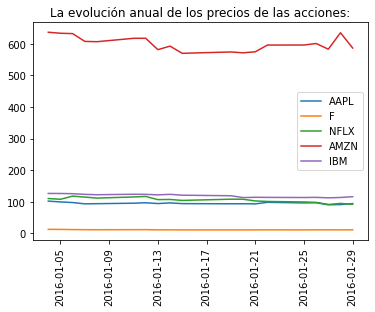

In [13]:
if wiki._data:
    for (cnt, s) in enumerate(stocks):
        plt.plot(wiki._data[cnt], label=s)
    plt.legend()
    plt.title("La evolución anual de los precios de las acciones:")
    plt.xticks(rotation=90)
    plt.show()
else:
    print('No hay datos cargados en la variable "wiki".')

Como todos los activos deben tener el mismo orden de magnitud en sus precios, los datos deben estar normalizados, observemos la siguiente gráfica para ver cómo se ven las series de tiempo normalizadas.

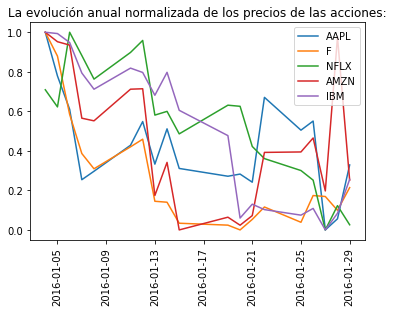

In [14]:
if wiki._data:
    for (cnt, s) in enumerate(stocks):
        min_ = np.min(wiki._data[cnt])
        max_ = np.max(wiki._data[cnt])
        norm = (wiki._data[cnt] - min_)/(max_- min_)
        plt.plot(norm, label=s)
    plt.legend()
    plt.title("La evolución anual normalizada de los precios de las acciones:")
    plt.xticks(rotation=90)
    plt.show()
else:
    print('No hay datos cargados en la variable "wiki".')

Parámetros de distribución normal

In [15]:
mu = wiki.get_period_return_mean_vector()
sigma = wiki.get_period_return_covariance_matrix()

Resolvamos el problema. Con un solucionador clásico, tu puedes programar la soluciones cuánticas para este ejemplo.

In [16]:
# número de activos (tamaño de nuestro arreglo de tickers NASDAQ)
num_assets = len(stocks)

# establecer factor de riesgo
q = 0.5

# establecer presupuesto
budget = 2

# establecer parámetro para escalar el término de penalización presupuestaria
penalty = num_assets

In [17]:
portfolio = PortfolioOptimization(expected_returns=mu, covariances=sigma, risk_factor=q, budget=budget)
qp = portfolio.to_quadratic_program()
qp

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Portfolio optimization

Minimize
 obj: 0.004003851233 x_0 + 0.006647566966 x_1 + 0.009129426904 x_2
      + 0.003891398085 x_3 + 0.004622523360 x_4 + [ 0.000798336105 x_0^2
      + 0.000677844604 x_0*x_1 + 0.000705589675 x_0*x_2 + 0.000772373590 x_0*x_3
      + 0.000389553072 x_0*x_4 + 0.000433411296 x_1^2 + 0.000019367485 x_1*x_2
      + 0.000355406478 x_1*x_3 + 0.000270086022 x_1*x_4 + 0.001749068336 x_2^2
      + 0.001615693677 x_2*x_3 + 0.000176362381 x_2*x_4 + 0.001354803282 x_3^2
      + 0.000262675516 x_3*x_4 + 0.000260455400 x_4^2 ]/2
Subject To
 c0: x_0 + x_1 + x_2 + x_3 + x_4 = 2

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4
End

In [18]:
exact_mes = NumPyMinimumEigensolver()
exact_eigensolver = MinimumEigenOptimizer(exact_mes)

result_classical = exact_eigensolver.solve(qp)

print_result(result_classical)

Optimización: selección [1. 0. 0. 0. 1.], valor 0.0094

----------------- Resultado completo ---------------------

selección	valor		probabilidad
------------------------------------------------------------
[1 0 0 0 1]	0.0094		1.0000
[1 1 1 1 1]	9.3322		0.0000
[0 1 1 1 0]	1.0556		0.0000
[1 0 0 0 0]	1.0376		0.0000
[0 1 0 0 0]	1.0401		0.0000
[1 1 0 0 0]	0.0116		0.0000
[0 0 1 0 0]	1.0432		0.0000
[1 0 1 0 0]	0.0148		0.0000
[0 1 1 0 0]	0.0169		0.0000
[1 1 1 0 0]	1.0552		0.0000
[0 0 0 1 0]	1.0378		0.0000
[1 0 0 1 0]	0.0094		0.0000
[0 1 0 1 0]	0.0116		0.0000
[1 1 0 1 0]	1.0500		0.0000
[0 0 1 1 0]	0.0154		0.0000
[1 0 1 1 0]	1.0537		0.0000
[1 1 1 1 0]	4.1608		0.0000
[0 1 1 1 1]	4.1604		0.0000
[0 0 0 0 1]	1.0380		0.0000
[0 1 0 0 1]	0.0118		0.0000
[1 1 0 0 1]	1.0499		0.0000
[0 0 1 0 1]	0.0148		0.0000
[1 0 1 0 1]	1.0530		0.0000
[0 1 1 0 1]	1.0551		0.0000
[1 1 1 0 1]	4.1600		0.0000
[0 0 0 1 1]	0.0095		0.0000
[1 0 0 1 1]	1.0477		0.0000
[0 1 0 1 1]	1.0498		0.0000
[1 1 0 1 1]	4.1548		0.0000
[0 0 1 1 1

La solución óptima es la del valor mínimo, que indica que se debe elegir el primer y último activo, es decir, `AAPL` e `IBM`.

**Esto puede variar según los valores de la serie temporal, que cambian según el momento en que se esté ejecutando este notebook.**

<a id="secc4"></a>
# Referencias

- [1] Economipedia. Finanzas. Consultado en: https://economipedia.com/definiciones/finanzas.html
- [2] IG. Cartera. Consultado en: https://www.ig.com/es/glosario-trading/definicion-de-cartera
- [3] Nulan. Decisiones Financieras con Programación Lineal: Diferentes Eatados de la Naturaleza. Consultado en: http://nulan.mdp.edu.ar/987/1/00401.pdf
- [4] Qiskit Development Team. Portfolio Optimization. Consultado en: https://qiskit.org/documentation/finance/tutorials/01_portfolio_optimization.html
- [5] Qiskit Development Team. Loading and Processing Stock-Market Time-Series Data. Consultado en: https://qiskit.org/documentation/finance/tutorials/11_time_series.html

<table width="100%">
    <tr style="background-color:white;">
        <td>
            <div style="text-align: left;">
            <a href="01_Optimization.ipynb" style="color: #EE2A6F; font-size: 15px; font-weight: normal;">
                &lt;&lt; Notebook anterior: 01_Optimization
            </a>
            </div>
        </td>
        <td>
            <div style="text-align: right;">
            <a href="03_Nature.ipynb" style="color: #EE2A6F; font-size: 15px; font-weight: normal;">
                Notebook siguiente: 03_Nature >>
            </a>
            </div>
        </td>
    </tr>
</table>